In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
df = pd.read_csv('MonthWiseMarketArrivals_Clean.csv')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


#### make a copy of df

In [4]:
df1 = df.copy()

In [5]:
df1.shape

(10227, 10)

In [6]:
df1.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [7]:
df1.duplicated().sum()

0

### Mumbai market separate

In [8]:
a = df1[df1['market'] == 'MUMBAI']
a

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008
...,...,...,...,...,...,...,...,...,...,...
6795,MUMBAI,December,2011,290350,519,994,749,MS,MUMBAI,December-2011
6796,MUMBAI,December,2012,218500,1048,1609,1330,MS,MUMBAI,December-2012
6797,MUMBAI,December,2013,226385,1298,1976,1639,MS,MUMBAI,December-2013
6798,MUMBAI,December,2014,294150,1433,2178,1802,MS,MUMBAI,December-2014


In [9]:
a['date'] = pd.to_datetime(a['date'])
a.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,2005-01-01
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,2006-01-01
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,2007-01-01
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,2008-01-01


In [10]:
a.sort_values(by='date',inplace=True)
a.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
6667,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI,2004-02-01
6680,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI,2004-03-01
6692,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01
6704,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI,2004-05-01


### Modal price of onion for each month for the Mumbai market

In [11]:
b = a.loc[:,('priceMod','date')]
b

,priceMod,date
6654,849,2004-01-01
6667,736,2004-02-01
6680,498,2004-03-01
6692,397,2004-04-01
6704,405,2004-05-01
...,...,...
6775,3748,2015-10-01
6787,2623,2015-11-01
6799,1542,2015-12-01
6666,1215,2016-01-01


In [12]:
b.set_index('date',inplace=True)
b

,priceMod
date,
2004-01-01,849
2004-02-01,736
2004-03-01,498
2004-04-01,397
2004-05-01,405
...,...
2015-10-01,3748
2015-11-01,2623
2015-12-01,1542


In [13]:
b.shape

(146, 1)

In [14]:
b.isnull().sum()

priceMod    0
dtype: int64

In [15]:
b.dtypes

priceMod    int64
dtype: object

In [16]:
b.describe()

,priceMod
count,146.000000
mean,1114.452055
std,883.113380
min,287.000000
25%,544.500000
50%,846.500000
75%,1391.500000
max,4714.000000


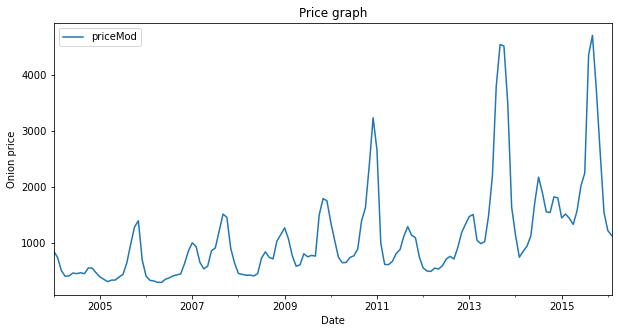

In [17]:
b.plot(figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Onion price")
plt.title("Price graph")
plt.legend()
plt.show()


#### Seasonal Decomposition

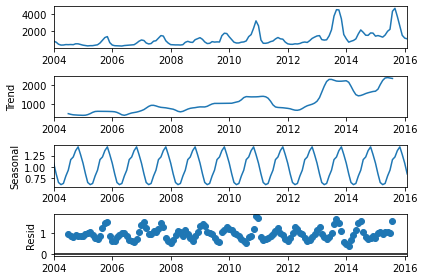

In [18]:
result = seasonal_decompose(b, model='multiplicative')
result.plot()
plt.show()

### Stationarity check

In [19]:
def adf_test(data):
    res = adfuller(data)
    print('ADF Statistic:',res[0])
    print('p-value:',res[1])
    if res[1]>0.05:
        print('Ho accpeted - Data is not stationary')
    else:
        print('H1 accpeted - Data is stationary')  

In [40]:
adf_test(b)

ADF Statistic: -4.437736321058303
p-value: 0.00025436714348672806
H1 accpeted - Data is stationary


ADF Statistic: -7.304890903904001
p-value: 1.309339350081912e-10
H1 accpeted - Data is stationary


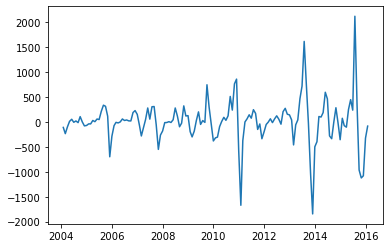

In [21]:
df_diff1 = b.diff(1).dropna() 
adf_test(df_diff1)
plt.plot(df_diff1)
plt.show()

In [22]:
### data is stationary so we don't need to transform data

### Plot ACF and PACF Functions

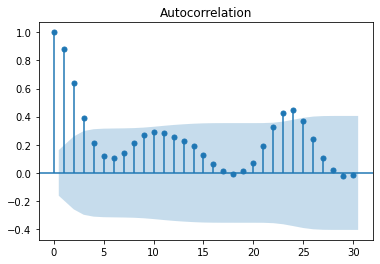

In [23]:
plot_acf(b,lags=30)
plt.show()

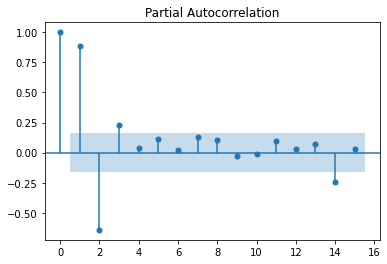

In [24]:
plot_pacf(b,lags=15)
plt.show()

### Inference
Since q from ACF is not in the range [0-7] , we are ignoring the b stationarity.

In [25]:
# acf and pacf with df_diff1

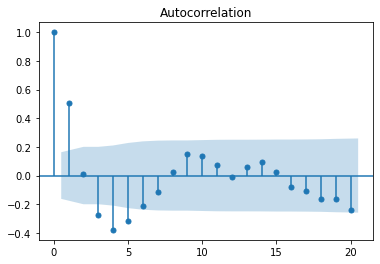

In [26]:
plot_acf(df_diff1,lags=20)
plt.show()
#q=2

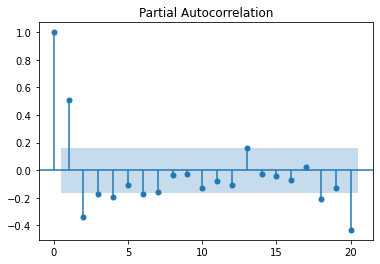

In [27]:
plot_pacf(df_diff1,lags=20)
plt.show()
#p=2

### Inference
Since p and q from ACF is in the range [0-5] or [0-7] , we can proceed with df_diff1 method of stationarity conversion

In [28]:
### Spliting the data into train and test

In [29]:
b.shape

(146, 1)

In [30]:
train= b[1:91]
test = b[91:]
print(train.shape)
print(test.shape)

(90, 1)
(55, 1)


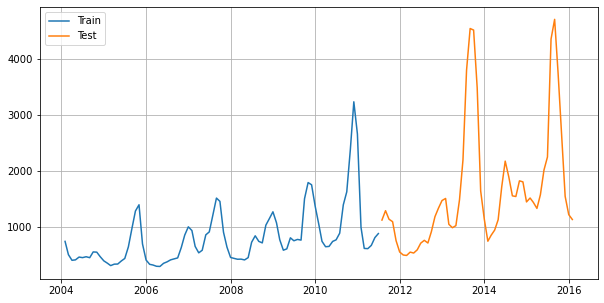

In [31]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.grid()
plt.legend()
plt.show()

#### Function for performace metrics

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [55]:
def test_metrics(test,pred):
    mse = mean_squared_error(test,pred)
    rmse = mean_squared_error(test,pred,squared=False)
    mape = mean_absolute_percentage_error(test,pred)
    return mse,rmse,mape

### Base AR Model(1,0,0)

In [56]:

from statsmodels.tsa.arima.model import ARIMA

In [57]:
m1 = ARIMA(train,order=(1,0,0))
ar_m1 = m1.fit()
print(ar_m1.summary())

                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                   90
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -638.157
Date:                Mon, 25 Jul 2022   AIC                           1282.315
Time:                        13:54:59   BIC                           1289.814
Sample:                    02-01-2004   HQIC                          1285.339
                         - 07-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        798.6000    271.110      2.946      0.003     267.234    1329.966
ar.L1          0.8190      0.042     19.508      0.000       0.737       0.901
sigma2      8.427e+04   6400.277     13.166      0.0

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [58]:
fcast_m1 = ar_m1.forecast(55)
fcast_m1

2011-08-01    861.993397
2011-09-01    850.521483
2011-10-01    841.125571
2011-11-01    833.429980
2011-12-01    827.127013
2012-01-01    821.964655
2012-02-01    817.736498
2012-03-01    814.273484
2012-04-01    811.437151
2012-05-01    809.114092
2012-06-01    807.211422
2012-07-01    805.653067
2012-08-01    804.376718
2012-09-01    803.331342
2012-10-01    802.475141
2012-11-01    801.773882
2012-12-01    801.199526
2013-01-01    800.729107
2013-02-01    800.343817
2013-03-01    800.028250
2013-04-01    799.769790
2013-05-01    799.558102
2013-06-01    799.384721
2013-07-01    799.242716
2013-08-01    799.126409
2013-09-01    799.031150
2013-10-01    798.953128
2013-11-01    798.889226
2013-12-01    798.836888
2014-01-01    798.794021
2014-02-01    798.758912
2014-03-01    798.730156
2014-04-01    798.706604
2014-05-01    798.687314
2014-06-01    798.671514
2014-07-01    798.658574
2014-08-01    798.647976
2014-09-01    798.639295
2014-10-01    798.632186
2014-11-01    798.626363


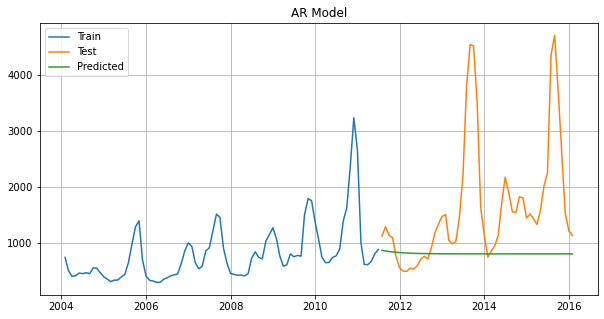

In [59]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m1,label='Predicted')
plt.title('AR Model')
plt.grid()
plt.legend()
plt.show()

In [60]:
aic_m1 = ar_m1.aic
print('AIC',aic_m1)
mse_m1,rmse_m1,mape_m1  = test_metrics(test,fcast_m1)

AIC 1282.3148041457607


In [61]:
m1_res = pd.DataFrame({'Model':'AR(1,0,0)','MSE':mse_m1,'RMSE':rmse_m1,
                       'MAPE':mape_m1,'AIC':aic_m1},index=[0])
m1_res

,Model,MSE,RMSE,MAPE,AIC
0,"AR(1,0,0)",1.885990e+06,1373.313418,0.444037,1282.314804


### Base MA Model (0,0,1)

In [62]:
m2 = ARIMA(train,order=(0,0,1))
ar_m2 = m2.fit()
print(ar_m2.summary())

                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                   90
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -645.240
Date:                Mon, 25 Jul 2022   AIC                           1296.479
Time:                        13:55:46   BIC                           1303.979
Sample:                    02-01-2004   HQIC                          1299.504
                         - 07-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        799.1956     89.623      8.917      0.000     623.537     974.854
ma.L1          0.9022      0.040     22.666      0.000       0.824       0.980
sigma2      9.696e+04   1.09e+04      8.859      0.0

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [63]:
fcast_m2 = ar_m2.forecast(55)
fcast_m2

2011-08-01    961.022545
2011-09-01    799.195565
2011-10-01    799.195565
2011-11-01    799.195565
2011-12-01    799.195565
2012-01-01    799.195565
2012-02-01    799.195565
2012-03-01    799.195565
2012-04-01    799.195565
2012-05-01    799.195565
2012-06-01    799.195565
2012-07-01    799.195565
2012-08-01    799.195565
2012-09-01    799.195565
2012-10-01    799.195565
2012-11-01    799.195565
2012-12-01    799.195565
2013-01-01    799.195565
2013-02-01    799.195565
2013-03-01    799.195565
2013-04-01    799.195565
2013-05-01    799.195565
2013-06-01    799.195565
2013-07-01    799.195565
2013-08-01    799.195565
2013-09-01    799.195565
2013-10-01    799.195565
2013-11-01    799.195565
2013-12-01    799.195565
2014-01-01    799.195565
2014-02-01    799.195565
2014-03-01    799.195565
2014-04-01    799.195565
2014-05-01    799.195565
2014-06-01    799.195565
2014-07-01    799.195565
2014-08-01    799.195565
2014-09-01    799.195565
2014-10-01    799.195565
2014-11-01    799.195565


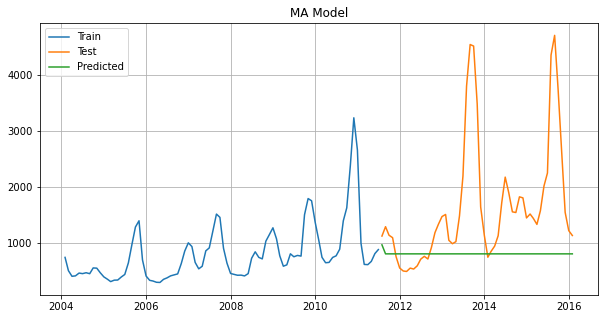

In [64]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m2,label='Predicted')
plt.title('MA Model')
plt.grid()
plt.legend()
plt.show()

In [65]:
aic_m2 = ar_m2.aic
print('AIC',aic_m2)
mse_m2,rmse_m2,mape_m2  = test_metrics(test,fcast_m2)

AIC 1296.4793192677791


In [66]:
m2_res = pd.DataFrame({'Model':'MA(0,0,1)','MSE':mse_m2,'RMSE':rmse_m2,
                       'MAPE':mape_m2,'AIC':aic_m2},index=[1])
m2_res

,Model,MSE,RMSE,MAPE,AIC
1,"MA(0,0,1)",1.885419e+06,1373.105686,0.440355,1296.479319


In [67]:
r2 = pd.concat([m1_res,m2_res])
r2

,Model,MSE,RMSE,MAPE,AIC
0,"AR(1,0,0)",1.885990e+06,1373.313418,0.444037,1282.314804
1,"MA(0,0,1)",1.885419e+06,1373.105686,0.440355,1296.479319


### Base ARMA Model (1,0,1)

In [68]:
m3 = ARIMA(train,order=(1,0,1))
ar_m3 = m3.fit()
print(ar_m3.summary())

                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                   90
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -620.997
Date:                Mon, 25 Jul 2022   AIC                           1249.995
Time:                        13:57:20   BIC                           1259.994
Sample:                    02-01-2004   HQIC                          1254.027
                         - 07-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        798.6849    212.844      3.752      0.000     381.519    1215.851
ar.L1          0.7121      0.059     12.043      0.000       0.596       0.828
ma.L1          0.6074      0.078      7.837      0.0

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [69]:
fcast_m3 = ar_m3.forecast(55)
fcast_m3

2011-08-01    889.745716
2011-09-01    863.530685
2011-10-01    844.862563
2011-11-01    831.568711
2011-12-01    822.101957
2012-01-01    815.360539
2012-02-01    810.559872
2012-03-01    807.141245
2012-04-01    804.706788
2012-05-01    802.973175
2012-06-01    801.738643
2012-07-01    800.859513
2012-08-01    800.233472
2012-09-01    799.787659
2012-10-01    799.470188
2012-11-01    799.244113
2012-12-01    799.083121
2013-01-01    798.968476
2013-02-01    798.886836
2013-03-01    798.828699
2013-04-01    798.787298
2013-05-01    798.757816
2013-06-01    798.736822
2013-07-01    798.721871
2013-08-01    798.711225
2013-09-01    798.703643
2013-10-01    798.698244
2013-11-01    798.694400
2013-12-01    798.691662
2014-01-01    798.689712
2014-02-01    798.688324
2014-03-01    798.687335
2014-04-01    798.686631
2014-05-01    798.686130
2014-06-01    798.685773
2014-07-01    798.685519
2014-08-01    798.685337
2014-09-01    798.685209
2014-10-01    798.685117
2014-11-01    798.685051


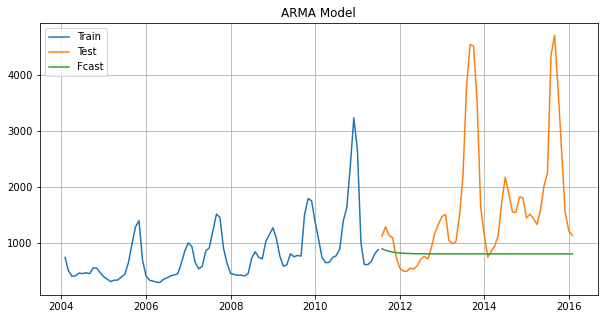

In [70]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m3,label='Fcast')
plt.title('ARMA Model')
plt.grid()
plt.legend()
plt.show()

In [71]:
aic_m3 = ar_m3.aic
print('AIC',aic_m3)
mse_m3,rmse_m3,mape_m3  = test_metrics(test,fcast_m3)

AIC 1249.994734307187


In [72]:
m3_res = pd.DataFrame({'Model':'ARMA(1,0,1)','MSE':mse_m3,'RMSE':rmse_m3,
                       'MAPE':mape_m3,'AIC':aic_m3},index=[2])
m3_res

,Model,MSE,RMSE,MAPE,AIC
2,"ARMA(1,0,1)",1.885380e+06,1373.091526,0.441803,1249.994734


In [73]:
r3 = pd.concat([r2,m3_res])
r3

,Model,MSE,RMSE,MAPE,AIC
0,"AR(1,0,0)",1.885990e+06,1373.313418,0.444037,1282.314804
1,"MA(0,0,1)",1.885419e+06,1373.105686,0.440355,1296.479319
2,"ARMA(1,0,1)",1.885380e+06,1373.091526,0.441803,1249.994734


### BASE ARIMA(1,1,1) Model

In [75]:
m4 = ARIMA(train,order=(1,1,1))
ar_m4 = m4.fit()
print(ar_m4.summary())

                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                   90
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -620.065
Date:                Mon, 25 Jul 2022   AIC                           1246.129
Time:                        13:58:49   BIC                           1253.595
Sample:                    02-01-2004   HQIC                          1249.139
                         - 07-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1322      0.116      1.143      0.253      -0.095       0.359
ma.L1          0.4944      0.136      3.643      0.000       0.228       0.760
sigma2       6.55e+04   6087.772     10.759      0.0

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [76]:
fcast_m4 = ar_m4.forecast(55)
fcast_m4

2011-08-01    896.266349
2011-09-01    898.946497
2011-10-01    899.300936
2011-11-01    899.347809
2011-12-01    899.354008
2012-01-01    899.354828
2012-02-01    899.354936
2012-03-01    899.354950
2012-04-01    899.354952
2012-05-01    899.354953
2012-06-01    899.354953
2012-07-01    899.354953
2012-08-01    899.354953
2012-09-01    899.354953
2012-10-01    899.354953
2012-11-01    899.354953
2012-12-01    899.354953
2013-01-01    899.354953
2013-02-01    899.354953
2013-03-01    899.354953
2013-04-01    899.354953
2013-05-01    899.354953
2013-06-01    899.354953
2013-07-01    899.354953
2013-08-01    899.354953
2013-09-01    899.354953
2013-10-01    899.354953
2013-11-01    899.354953
2013-12-01    899.354953
2014-01-01    899.354953
2014-02-01    899.354953
2014-03-01    899.354953
2014-04-01    899.354953
2014-05-01    899.354953
2014-06-01    899.354953
2014-07-01    899.354953
2014-08-01    899.354953
2014-09-01    899.354953
2014-10-01    899.354953
2014-11-01    899.354953


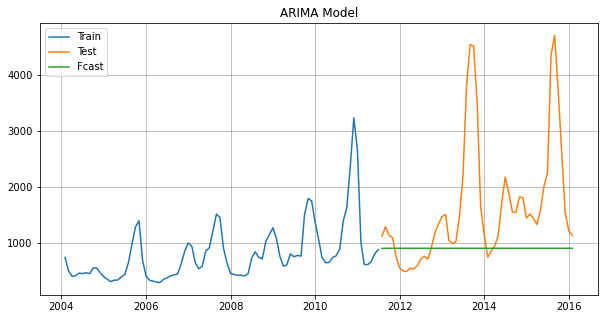

In [77]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m4,label='Fcast')
plt.title('ARIMA Model')
plt.grid()
plt.legend()
plt.show()

In [78]:
aic_m4 = ar_m4.aic
print('AIC',aic_m4)

mse_m4,rmse_m4,mape_m4  = test_metrics(test,fcast_m4)

AIC 1246.1294214865266


In [79]:
m4_res = pd.DataFrame({'Model':'ARIMA(1,1,1)','MSE':mse_m4,'RMSE':rmse_m4,
                       'MAPE':mape_m4,'AIC':aic_m4},index=[3])
m4_res

,Model,MSE,RMSE,MAPE,AIC
3,"ARIMA(1,1,1)",1.729229e+06,1315.00147,0.425751,1246.129421


In [80]:
r4 = pd.concat([r3,m4_res])
r4

,Model,MSE,RMSE,MAPE,AIC
0,"AR(1,0,0)",1.885990e+06,1373.313418,0.444037,1282.314804
1,"MA(0,0,1)",1.885419e+06,1373.105686,0.440355,1296.479319
2,"ARMA(1,0,1)",1.885380e+06,1373.091526,0.441803,1249.994734
3,"ARIMA(1,1,1)",1.729229e+06,1315.001470,0.425751,1246.129421


## Custom ARIMA

In [129]:
p = list(range(0,5)) # p=0,1,2,3,4
d = list(range(0,4)) # d = 0,1,2,3
q = list(range(0,5)) # q = 0,1,2,3,4
mse_arima = []
rmse_arima = []
aic_arima = []
pdq = []
def custom_arima():
    for i in p:
        for j in d:
            for k in q:
                param = (i,j,k)
                model = ARIMA(train,order=param)
                model_fit = model.fit()
                ypred = model_fit.forecast(steps=55)
                mse = mean_squared_error(test,ypred.values)
                rmse = np.sqrt(mean_squared_error(test,ypred.values))
                mse_arima.append(mse)
                rmse_arima.append(rmse)
                aic_arima.append(model_fit.aic)
                pdq.append((i,j,k))
                print(f'ARIMA at (p,d,q): {i,j,k}')
                print(f'MSE: {round(mse,3)} RMSE: {round(rmse,3)} AIC: {round(model_fit.aic,3)}')
                print('-'*70)
custom_arima()    

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

ARIMA at (p,d,q): (0, 0, 0)
MSE: 1887816.343 RMSE: 1373.978 AIC: 1383.157
----------------------------------------------------------------------
ARIMA at (p,d,q): (0, 0, 1)
MSE: 1885419.225 RMSE: 1373.106 AIC: 1296.479
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (0, 0, 2)
MSE: 1891807.131 RMSE: 1375.43 AIC: 1248.658
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (0, 0, 3)
MSE: 1892336.097 RMSE: 1375.622 AIC: 1246.367
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (0, 0, 4)
MSE: 1890022.806 RMSE: 1374.781 AIC: 1242.364
----------------------------------------------------------------------
ARIMA at (p,d,q): (0, 1, 0)
MSE: 1764157.909 RMSE: 1328.216 AIC: 1272.003
----------------------------------------------------------------------
ARIMA at (p,d,q): (0, 1, 1)
MSE: 1727445.236 RMSE: 1314.323 AIC: 1244.877
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

ARIMA at (p,d,q): (0, 1, 2)
MSE: 1761986.2 RMSE: 1327.398 AIC: 1245.072
----------------------------------------------------------------------
ARIMA at (p,d,q): (0, 1, 3)
MSE: 1481828.534 RMSE: 1217.304 AIC: 1231.526
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (0, 1, 4)
MSE: 1500624.186 RMSE: 1225.0 AIC: 1231.421
----------------------------------------------------------------------
ARIMA at (p,d,q): (0, 2, 0)
MSE: 2946329.836 RMSE: 1716.488 AIC: 1267.983
----------------------------------------------------------------------
ARIMA at (p,d,q): (0, 2, 1)


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

MSE: 2433677.65 RMSE: 1560.025 AIC: 1269.807
----------------------------------------------------------------------
ARIMA at (p,d,q): (0, 2, 2)
MSE: 1644580.543 RMSE: 1282.412 AIC: 1237.064
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

ARIMA at (p,d,q): (0, 2, 3)
MSE: 1723885.705 RMSE: 1312.968 AIC: 1236.918
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

ARIMA at (p,d,q): (0, 2, 4)
MSE: 1021551.563 RMSE: 1010.718 AIC: 1224.362
----------------------------------------------------------------------
ARIMA at (p,d,q): (0, 3, 0)
MSE: 2184192628.745 RMSE: 46735.347 AIC: 1312.598
----------------------------------------------------------------------
ARIMA at (p,d,q): (0, 3, 1)
MSE: 9581844.565 RMSE: 3095.455 AIC: 1260.485
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (0, 3, 2)
MSE: 7661714.696 RMSE: 2767.98 AIC: 1262.146
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (0, 3, 3)
MSE: 5719056.972 RMSE: 2391.455 AIC: 1234.127
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (0, 3, 4)
MSE: 7344008.983 RMSE: 2709.983 AIC: 1233.419
----------------------------------------------------------------------
ARIMA at (p,d,q): (1, 0, 0)
MSE: 1885989.744 RMSE: 1373.313 AIC: 1282.315
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

ARIMA at (p,d,q): (1, 0, 1)
MSE: 1885380.338 RMSE: 1373.092 AIC: 1249.995
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (1, 0, 2)
MSE: 1889604.299 RMSE: 1374.629 AIC: 1242.811
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (1, 0, 3)
MSE: 1891058.162 RMSE: 1375.158 AIC: 1244.15
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (1, 0, 4)
MSE: 1891151.067 RMSE: 1375.191 AIC: 1243.829
----------------------------------------------------------------------
ARIMA at (p,d,q): (1, 1, 0)
MSE: 1682448.37 RMSE: 1297.092 AIC: 1254.976
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

ARIMA at (p,d,q): (1, 1, 1)
MSE: 1729228.867 RMSE: 1315.001 AIC: 1246.129
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (1, 1, 2)
MSE: 1595888.183 RMSE: 1263.285 AIC: 1237.869
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (1, 1, 3)
MSE: 1533509.986 RMSE: 1238.35 AIC: 1229.865
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (1, 1, 4)
MSE: 1550698.643 RMSE: 1245.271 AIC: 1231.515
----------------------------------------------------------------------
ARIMA at (p,d,q): (1, 2, 0)
MSE: 2803178.11 RMSE: 1674.269 AIC: 1269.94
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

ARIMA at (p,d,q): (1, 2, 1)
MSE: 1611549.997 RMSE: 1269.468 AIC: 1246.798
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (1, 2, 2)
MSE: 1662067.858 RMSE: 1289.212 AIC: 1238.133
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (1, 2, 3)
MSE: 2021574.289 RMSE: 1421.821 AIC: 1234.145
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (1, 2, 4)
MSE: 1014252.244 RMSE: 1007.101 AIC: 1222.357
----------------------------------------------------------------------
ARIMA at (p,d,q): (1, 3, 0)
MSE: 517718647.436 RMSE: 22753.432 AIC: 1306.973
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

ARIMA at (p,d,q): (1, 3, 1)
MSE: 9017287.878 RMSE: 3002.88 AIC: 1262.386
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (1, 3, 2)
MSE: 12425189.493 RMSE: 3524.938 AIC: 1261.726
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (1, 3, 3)
MSE: 1395244.229 RMSE: 1181.205 AIC: 1236.349
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

ARIMA at (p,d,q): (1, 3, 4)
MSE: 2252462.597 RMSE: 1500.821 AIC: 1232.286
----------------------------------------------------------------------
ARIMA at (p,d,q): (2, 0, 0)
MSE: 1884179.685 RMSE: 1372.654 AIC: 1248.328
----------------------------------------------------------------------
ARIMA at (p,d,q): (2, 0, 1)
MSE: 1885234.94 RMSE: 1373.039 AIC: 1244.93
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (2, 0, 2)
MSE: 1890903.471 RMSE: 1375.101 AIC: 1243.155
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (2, 0, 3)
MSE: 1890812.567 RMSE: 1375.068 AIC: 1245.078
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (2, 0, 4)
MSE: 1893051.811 RMSE: 1375.882 AIC: 1245.604
----------------------------------------------------------------------
ARIMA at (p,d,q): (2, 1, 0)
MSE: 1849198.547 RMSE: 1359.852 AIC: 1240.061
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

ARIMA at (p,d,q): (2, 1, 1)
MSE: 1418441.225 RMSE: 1190.983 AIC: 1231.926
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (2, 1, 2)
MSE: 1461355.791 RMSE: 1208.865 AIC: 1230.846
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (2, 1, 3)
MSE: 1568391.391 RMSE: 1252.354 AIC: 1230.689
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (2, 1, 4)
MSE: 1561483.073 RMSE: 1249.593 AIC: 1232.539
----------------------------------------------------------------------
ARIMA at (p,d,q): (2, 2, 0)
MSE: 2423387.874 RMSE: 1556.723 AIC: 1258.05
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

ARIMA at (p,d,q): (2, 2, 1)
MSE: 1760054.394 RMSE: 1326.67 AIC: 1232.699
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (2, 2, 2)
MSE: 1053111.89 RMSE: 1026.212 AIC: 1223.511
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (2, 2, 3)
MSE: 2027187.454 RMSE: 1423.793 AIC: 1234.611
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (2, 2, 4)
MSE: 1968751.387 RMSE: 1403.122 AIC: 1234.907
----------------------------------------------------------------------
ARIMA at (p,d,q): (2, 3, 0)
MSE: 3294407.168 RMSE: 1815.05 AIC: 1291.66
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warni

ARIMA at (p,d,q): (2, 3, 1)
MSE: 7780241.141 RMSE: 2789.308 AIC: 1251.202
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (2, 3, 2)
MSE: 6777759.232 RMSE: 2603.413 AIC: 1230.213
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (2, 3, 3)
MSE: 1199904.985 RMSE: 1095.402 AIC: 1256.333
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

ARIMA at (p,d,q): (2, 3, 4)
MSE: 14993960.379 RMSE: 3872.204 AIC: 1242.778
----------------------------------------------------------------------
ARIMA at (p,d,q): (3, 0, 0)
MSE: 1886094.82 RMSE: 1373.352 AIC: 1245.529
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (3, 0, 1)
MSE: 1885690.336 RMSE: 1373.204 AIC: 1246.751
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (3, 0, 2)
MSE: 1890654.209 RMSE: 1375.011 AIC: 1244.942
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (3, 0, 3)
MSE: 1890608.142 RMSE: 1374.994 AIC: 1246.415
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

ARIMA at (p,d,q): (3, 0, 4)
MSE: 1896554.546 RMSE: 1377.155 AIC: 1246.201
----------------------------------------------------------------------
ARIMA at (p,d,q): (3, 1, 0)
MSE: 1857472.084 RMSE: 1362.891 AIC: 1241.979
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (3, 1, 1)
MSE: 1863837.142 RMSE: 1365.224 AIC: 1243.92
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (3, 1, 2)
MSE: 1422606.987 RMSE: 1192.731 AIC: 1233.4
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (3, 1, 3)
MSE: 1531073.602 RMSE: 1237.366 AIC: 1232.098
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

ARIMA at (p,d,q): (3, 1, 4)
MSE: 1284742.927 RMSE: 1133.465 AIC: 1228.753
----------------------------------------------------------------------
ARIMA at (p,d,q): (3, 2, 0)
MSE: 2038590.62 RMSE: 1427.792 AIC: 1256.482
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (3, 2, 1)
MSE: 1764282.747 RMSE: 1328.263 AIC: 1234.651
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (3, 2, 2)
MSE: 1772300.621 RMSE: 1331.278 AIC: 1235.459
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (3, 2, 3)
MSE: 2026559.034 RMSE: 1423.573 AIC: 1236.479
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

ARIMA at (p,d,q): (3, 2, 4)
MSE: 2049965.162 RMSE: 1431.77 AIC: 1237.706
----------------------------------------------------------------------
ARIMA at (p,d,q): (3, 3, 0)
MSE: 2094380688.895 RMSE: 45764.404 AIC: 1281.209
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (3, 3, 1)
MSE: 6420334.485 RMSE: 2533.838 AIC: 1250.001
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (3, 3, 2)
MSE: 4103128.49 RMSE: 2025.618 AIC: 1252.559
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (3, 3, 3)
MSE: 4922656.247 RMSE: 2218.706 AIC: 1256.006
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

ARIMA at (p,d,q): (3, 3, 4)
MSE: 4343514.525 RMSE: 2084.11 AIC: 1242.789
----------------------------------------------------------------------
ARIMA at (p,d,q): (4, 0, 0)
MSE: 1885072.792 RMSE: 1372.98 AIC: 1246.398
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (4, 0, 1)
MSE: 1885063.383 RMSE: 1372.976 AIC: 1248.398
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

ARIMA at (p,d,q): (4, 0, 2)
MSE: 1889049.444 RMSE: 1374.427 AIC: 1243.231
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (4, 0, 3)
MSE: 1888924.696 RMSE: 1374.382 AIC: 1245.438
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (4, 0, 4)
MSE: 1888582.825 RMSE: 1374.257 AIC: 1246.963
----------------------------------------------------------------------
ARIMA at (p,d,q): (4, 1, 0)
MSE: 1891631.066 RMSE: 1375.366 AIC: 1242.147
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (4, 1, 1)
MSE: 1393229.873 RMSE: 1180.352 AIC: 1230.555
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (4, 1, 2)
MSE: 1461739.257 RMSE: 1209.024 AIC: 1234.326
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

ARIMA at (p,d,q): (4, 1, 3)
MSE: 1453967.725 RMSE: 1205.806 AIC: 1229.524
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (4, 1, 4)
MSE: 1298334.49 RMSE: 1139.445 AIC: 1231.036
----------------------------------------------------------------------
ARIMA at (p,d,q): (4, 2, 0)
MSE: 946252.594 RMSE: 972.755 AIC: 1256.921
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (4, 2, 1)
MSE: 1790950.412 RMSE: 1338.264 AIC: 1235.12
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (4, 2, 2)
MSE: 1780734.446 RMSE: 1334.442 AIC: 1237.274
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

ARIMA at (p,d,q): (4, 2, 3)
MSE: 1915578.035 RMSE: 1384.044 AIC: 1234.004
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

ARIMA at (p,d,q): (4, 2, 4)
MSE: 1033789.99 RMSE: 1016.755 AIC: 1231.235
----------------------------------------------------------------------
ARIMA at (p,d,q): (4, 3, 0)
MSE: 14947077154.677 RMSE: 122258.24 AIC: 1279.312
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (4, 3, 1)
MSE: 2181138.973 RMSE: 1476.868 AIC: 1250.699
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA at (p,d,q): (4, 3, 2)
MSE: 6392732.576 RMSE: 2528.385 AIC: 1252.466
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  w

ARIMA at (p,d,q): (4, 3, 3)
MSE: 2237272.068 RMSE: 1495.751 AIC: 1248.952
----------------------------------------------------------------------
ARIMA at (p,d,q): (4, 3, 4)
MSE: 6149775.939 RMSE: 2479.874 AIC: 1243.713
----------------------------------------------------------------------


D:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [130]:
print(min(mse_arima),mse_arima.index(min(mse_arima)))
print(min(rmse_arima),rmse_arima.index(min(rmse_arima)))
print(min(aic_arima),aic_arima.index(min(aic_arima)))
print(pdq[47],pdq[54])

946252.5942803315 90
972.7551563884571 90
1222.3571070779496 34
(2, 1, 2) (2, 2, 4)


In [ ]:
# so the best value of (p,d,q) is(2,1,2) where rmse is 972.755 lets build a model on that

### ARIMA(2,1,2)

In [81]:
m5 = ARIMA(train,order=(2,1,2))
ar_m5 = m5.fit()
print(ar_m5.summary())

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                   90
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -610.423
Date:                Mon, 25 Jul 2022   AIC                           1230.846
Time:                        13:59:53   BIC                           1243.290
Sample:                    02-01-2004   HQIC                          1235.862
                         - 07-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0609      0.093     11.355      0.000       0.878       1.244
ar.L2         -0.4511      0.150     -3.004      0.003      -0.745      -0.157
ma.L1         -0.6128      0.115     -5.318      0.0

In [82]:
fcast_m5 = ar_m5.forecast(55)
fcast_m5

2011-08-01     968.976258
2011-09-01    1067.123073
2011-10-01    1129.312190
2011-11-01    1151.020730
2011-12-01    1146.001273
2012-01-01    1130.884316
2012-02-01    1117.110414
2012-03-01    1109.315895
2012-04-01    1107.259259
2012-05-01    1108.593062
2012-06-01    1110.935778
2012-07-01    1112.819605
2012-08-01    1113.761515
2012-09-01    1113.911104
2012-10-01    1113.644956
2012-11-01    1113.295120
2012-12-01    1113.044018
2013-01-01    1112.935412
2013-02-01    1112.933450
2013-03-01    1112.980355
2013-04-01    1113.031003
2013-05-01    1113.063579
2013-06-01    1113.075296
2013-07-01    1113.073033
2013-08-01    1113.065347
2013-09-01    1113.058213
2013-10-01    1113.054112
2013-11-01    1113.052978
2013-12-01    1113.053626
2014-01-01    1113.054824
2014-02-01    1113.055803
2014-03-01    1113.056301
2014-04-01    1113.056388
2014-05-01    1113.056256
2014-06-01    1113.056076
2014-07-01    1113.055945
2014-08-01    1113.055887
2014-09-01    1113.055885
2014-10-01  

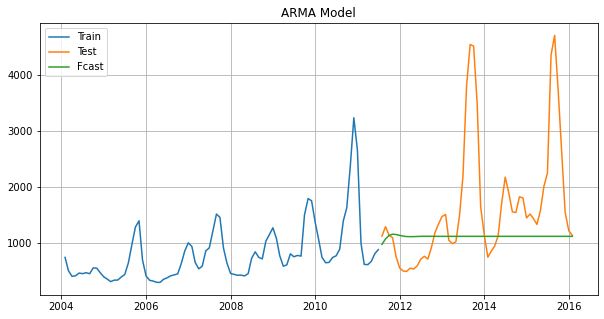

In [83]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m5,label='Fcast')
plt.title('ARMA Model')
plt.grid()
plt.legend()
plt.show()

In [84]:
aic_m5 = ar_m5.aic
print('AIC',aic_m5)

mse_m5,rmse_m5,mape_m5  = test_metrics(test,fcast_m5)

AIC 1230.846333485862


In [85]:
m5_res = pd.DataFrame({'Model':'ARIMA(2,1,2)','MSE':mse_m5,'RMSE':rmse_m5,
                       'MAPE':mape_m5,'AIC':aic_m5},index=[4])
m5_res

,Model,MSE,RMSE,MAPE,AIC
4,"ARIMA(2,1,2)",1.461356e+06,1208.865497,0.423742,1230.846333


In [110]:
r5 = pd.concat([r4,m5_res])
r5

,Model,MSE,RMSE,MAPE,AIC
0,"AR(1,0,0)",1.885990e+06,1373.313418,0.444037,1282.314804
1,"MA(0,0,1)",1.885419e+06,1373.105686,0.440355,1296.479319
2,"ARMA(1,0,1)",1.885380e+06,1373.091526,0.441803,1249.994734
3,"ARIMA(1,1,1)",1.729229e+06,1315.001470,0.425751,1246.129421
4,"ARIMA(2,1,2)",1.461356e+06,1208.865497,0.423742,1230.846333


In [103]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### TES (Holt Winter Method)

In [104]:
alpha= 0.2
beta = 0.4
gamma = 0.3
m6 = ExponentialSmoothing(train)
tes_m6 = m6.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
print(tes_m6.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 priceMod   No. Observations:                   90
Model:             ExponentialSmoothing   SSE                       18076268.651
Optimized:                         True   AIC                           1102.927
Trend:                             None   BIC                           1107.927
Seasonal:                          None   AICC                          1103.398
Seasonal Periods:                  None   Date:                 Mon, 25 Jul 2022
Box-Cox:                          False   Time:                         14:17:20
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha                False
initial_level              509.227

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


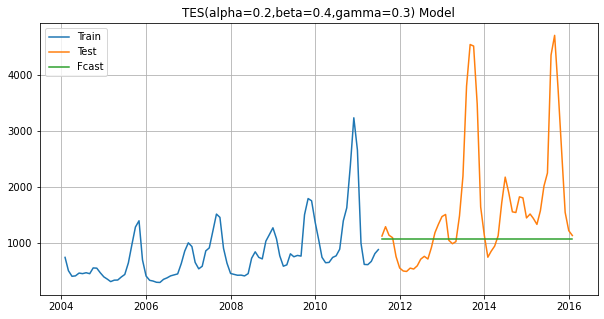

In [106]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m9,label='Fcast')
plt.title('TES(alpha=0.2,beta=0.4,gamma=0.3) Model')
plt.grid()
plt.legend()
plt.show()

In [107]:
aic_m6 = tes_m6.aic
print('AIC',aic_m6)
mse_m6,rmse_m6,mape_m6  = test_metrics(test,fcast_m6)

m6_res = pd.DataFrame({'Model':'TES(alpha=0.2,beta=0.4,gamma=0.3)','MSE':mse_m6,'RMSE':rmse_m6,
                       'MAPE':mape_m6,'AIC':aic_m6},index=[5])
m6_res

AIC 1102.9270757219397


,Model,MSE,RMSE,MAPE,AIC
5,"TES(alpha=0.2,beta=0.4,gamma=0.3)",1.507281e+06,1227.713736,0.417109,1102.927076


In [116]:
r7 = pd.concat([r5,m6_res])
r7

,Model,MSE,RMSE,MAPE,AIC
0,"AR(1,0,0)",1.885990e+06,1373.313418,0.444037,1282.314804
1,"MA(0,0,1)",1.885419e+06,1373.105686,0.440355,1296.479319
2,"ARMA(1,0,1)",1.885380e+06,1373.091526,0.441803,1249.994734
3,"ARIMA(1,1,1)",1.729229e+06,1315.001470,0.425751,1246.129421
4,"ARIMA(2,1,2)",1.461356e+06,1208.865497,0.423742,1230.846333
5,"TES(alpha=0.2,beta=0.4,gamma=0.3)",1.507281e+06,1227.713736,0.417109,1102.927076


# Forecast onion price for Mumbai market using Triple Exponential Smoothing (Holt Winter Smoothing)(alpha=0.2,beta=0.4,gamma=0.3)

In [119]:
fcast_m6 = tes_m6.forecast(55)
fcast_m6

2011-08-01    1069.632277
2011-09-01    1069.632277
2011-10-01    1069.632277
2011-11-01    1069.632277
2011-12-01    1069.632277
2012-01-01    1069.632277
2012-02-01    1069.632277
2012-03-01    1069.632277
2012-04-01    1069.632277
2012-05-01    1069.632277
2012-06-01    1069.632277
2012-07-01    1069.632277
2012-08-01    1069.632277
2012-09-01    1069.632277
2012-10-01    1069.632277
2012-11-01    1069.632277
2012-12-01    1069.632277
2013-01-01    1069.632277
2013-02-01    1069.632277
2013-03-01    1069.632277
2013-04-01    1069.632277
2013-05-01    1069.632277
2013-06-01    1069.632277
2013-07-01    1069.632277
2013-08-01    1069.632277
2013-09-01    1069.632277
2013-10-01    1069.632277
2013-11-01    1069.632277
2013-12-01    1069.632277
2014-01-01    1069.632277
2014-02-01    1069.632277
2014-03-01    1069.632277
2014-04-01    1069.632277
2014-05-01    1069.632277
2014-06-01    1069.632277
2014-07-01    1069.632277
2014-08-01    1069.632277
2014-09-01    1069.632277
2014-10-01  

### Inference
<b> Based on RMSE or MSE </b>

ARIMA(2,1,2) is the most appropriate model(best considering other models)<br>